# TO PREDICT IF THE CUSTOMER SHOULD GET LOAN OR NOT.

## SOURCE : MU-SIGMA Hackathon.

## PROBLEM STATEMENT : 

A Personl loan is an unsecured credit provided by financial institutions based on criteria like employement history, repayment capacity,income level , profession and credit history. This is also known as consumer loan or multi-purpose loan, and it helps 
the borrower meet any of their immediate needs.

**One of the leading bankers in U.S has approached you to predict on the defaulters with the help of the recent data  on the personal loans availed by various customers.**


###  IMPORTING LIBRARY'S

In [1]:
import numpy as np
import pandas as pd
from pandas import Series as ser
from pandas import DataFrame as df
import seaborn as sns
import scipy
from scipy import stats
import matplotlib.pyplot as plt 
import warnings
warnings.filterwarnings("ignore")
from sklearn.preprocessing import PowerTransformer , StandardScaler , LabelEncoder
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
import statsmodels.api as sm 
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import  classification_report , confusion_matrix , roc_auc_score, roc_curve, accuracy_score
from sklearn.model_selection import GridSearchCV

### LOADING DATASETS

In [2]:
train = pd.read_csv("Data_Train.csv")
test = pd.read_csv("Data_Test.csv")

In [3]:
train.head(5)

,ID,Asst_Reg,GGGrade,Experience,Validation,Yearly Income,Home Status,Unpaid 2 years,Already Defaulted,Designation,...,File Status,State,Account Open,Total Unpaid CL,Duration,Unpaid Amount,Reason,Claim Type,Due Fee,Loan/No Loan
0,95074,421802,II,>10yrs,Vfied,633600.00,MOR??AGE,0,0,GLENDALE NISSAN,...,fully paid,California,17,58598.0,3 years,31216.05,debt consolidation,I,0.0,0
1,134131,3964312,IV,7yrs,Source Verified,85483.20,REN?,0,0,Business Teacher,...,whole,NC,15,18924.0,5 years,11660.49,debt consolidation,I,0.0,0
2,92602,4247560,III,<1yr,Source Verified,79200.00,REN?,0,0,driver,...,whole,Florida,7,15604.0,5 years,5637.87,major purchase,I,0.0,0
3,22591,197179,III,<1yr,Vfied,61600.00,REN?,0,0,AvePoint,...,fully paid,NewJersey,9,22410.0,3 years,15607.17,major purchase,I,0.0,1
4,125060,4646684,V,2yrs,Source Verified,68053.92,REN?,0,0,Lead Tester,...,fully paid,LA,10,36022.0,5 years,27472.86,debt consolidation,I,0.0,0


In [4]:
test.head(2)

,ID,Asst_Reg,GGGrade,Experience,Validation,Yearly Income,Home Status,Unpaid 2 years,Already Defaulted,Designation,...,Sub GGGrade,File Status,State,Account Open,Total Unpaid CL,Duration,Unpaid Amount,Reason,Claim Type,Due Fee
0,198980,1773284,II,2yrs,Source Verified,140800.0,OWN,0,0,processor,...,17,fully paid,California,23,33532.0,3 years,15755.94,major purchase,I,0.0
1,167688,5298273,II,>10yrs,Vfied,146080.0,MOR??AGE,0,0,Speech Language Pathologist,...,19,whole,Florida,17,149234.0,5 years,68237.55,debt consolidation,I,0.0


In [5]:
train.shape , test.shape

((87500, 30), (37500, 29))

### FINDING NULL VALUES

In [6]:
train.isnull().sum()

ID                        0
Asst_Reg                  0
GGGrade                   0
Experience                0
Validation                0
Yearly Income          5575
Home Status               0
Unpaid 2 years            0
Already Defaulted         0
Designation            1414
Debt to Income         3489
Postal Code            1389
Lend Amount               0
Deprecatory Records       0
Interest Charged          0
Usage Rate                0
Inquiries                 0
Present Balance           0
Gross Collection          0
Sub GGGrade               0
File Status               0
State                     0
Account Open              0
Total Unpaid CL        4186
Duration                  0
Unpaid Amount          4852
Reason                    0
Claim Type                0
Due Fee                   0
Loan/No Loan              0
dtype: int64

In [7]:
test.isna().sum()

ID                        0
Asst_Reg                  0
GGGrade                   0
Experience                0
Validation                0
Yearly Income          2425
Home Status               0
Unpaid 2 years            0
Already Defaulted         0
Designation             586
Debt to Income         1511
Postal Code             611
Lend Amount               0
Deprecatory Records       0
Interest Charged          0
Usage Rate                0
Inquiries                 0
Present Balance           0
Gross Collection          0
Sub GGGrade               0
File Status               0
State                     0
Account Open              0
Total Unpaid CL        1814
Duration                  0
Unpaid Amount          2069
Reason                    0
Claim Type                0
Due Fee                   0
dtype: int64

### Concating both the DataSets

In [8]:
combi = pd.concat([train, test], ignore_index=True)
combi.shape

(125000, 30)

In [9]:
combi.dtypes

ID                       int64
Asst_Reg                 int64
GGGrade                 object
Experience              object
Validation              object
Yearly Income          float64
Home Status             object
Unpaid 2 years           int64
Already Defaulted        int64
Designation             object
Debt to Income         float64
Postal Code            float64
Lend Amount            float64
Deprecatory Records      int64
Interest Charged       float64
Usage Rate             float64
Inquiries                int64
Present Balance        float64
Gross Collection       float64
Sub GGGrade              int64
File Status             object
State                   object
Account Open             int64
Total Unpaid CL        float64
Duration                object
Unpaid Amount          float64
Reason                  object
Claim Type              object
Due Fee                float64
Loan/No Loan           float64
dtype: object

In [10]:
combi.T

,0,1,2,3,4,5,6,7,8,9,...,124990,124991,124992,124993,124994,124995,124996,124997,124998,124999
ID,95074,134131,92602,22591,125060,21803,141442,94448,109853,138407,...,203126,190580,220314,180640,157086,191405,164868,163156,169610,175557
Asst_Reg,421802,3964312,4247560,197179,4646684,1771402,6308843,1468916,7067902,2704860,...,7126858,903464,3747691,4990321,3702525,5774816,1423834,1895531,2168910,4140268
GGGrade,II,IV,III,III,V,II,III,III,VII,II,...,III,III,IV,III,III,IV,IV,V,VI,II
Experience,>10yrs,7yrs,<1yr,<1yr,2yrs,1yrs,>10yrs,4yrs,<1yr,2yrs,...,5yrs,9yrs,>10yrs,2yrs,>10yrs,4yrs,8yrs,>10yrs,9yrs,>10yrs
Validation,Vfied,Source Verified,Source Verified,Vfied,Source Verified,Source Verified,Source Verified,Source Verified,Vfied,Not Vfied,...,Vfied,Vfied,Source Verified,Not Vfied,Not Vfied,Vfied,Source Verified,Not Vfied,Not Vfied,Source Verified
Yearly Income,633600.0,85483.2,79200.0,61600.0,68053.92,219648.0,88000.0,NaN,NaN,149600.0,...,93280.0,103840.0,NaN,35200.0,NaN,308000.0,158400.0,52800.0,52800.0,121440.0
Home Status,MOR??AGE,REN?,REN?,REN?,REN?,MOR??AGE,REN?,REN?,REN?,OWN,...,REN?,REN?,MOR??AGE,REN?,MOR??AGE,MOR??AGE,MOR??AGE,OWN,OWN,MOR??AGE
Unpaid 2 years,0,0,0,0,0,4,0,2,0,0,...,0,0,1,0,0,1,0,0,5,0
Already Defaulted,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Designation,GLENDALE NISSAN,Business Teacher,driver,AvePoint,Lead Tester,Financial Controller,Chef,General manager,laborer,truck driver,...,Licensed practical nurse,Grinderhand,ER register,Parade Performer,Sr. Chemistry Technician,Regional Manager,Clinical Coordinator,administrative,ParaEducator,School Teacher


### INFERENCES :

1. There are 30 columns with all together 125000 rows.
2. There are null values present in the data.
3. The invalid entries are also present in the columns.
4. Most of the columns are integer/numerical in data type.
5. Some columns like zip-code, id seems irrelevent.

### DATA WRANGLING AND CLEANING

In [11]:
combi.ID.value_counts()

95074     1
122966    1
67274     1
95318     1
82877     1
         ..
91453     1
136825    1
103187    1
101199    1
175557    1
Name: ID, Length: 125000, dtype: int64

<AxesSubplot:>

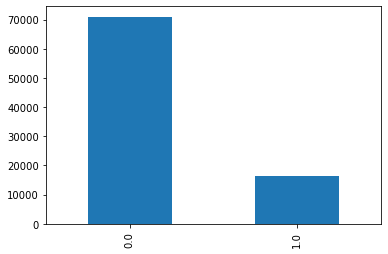

In [12]:
combi["Loan/No Loan"].value_counts().plot.bar()

<AxesSubplot:xlabel='Asst_Reg'>

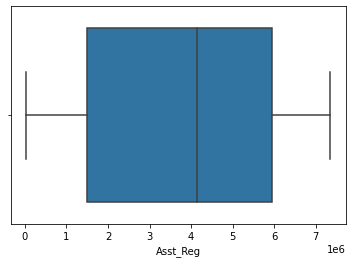

In [13]:
sns.boxplot(combi["Asst_Reg"])

In [14]:
combi["GGGrade"].unique()

array(['II', 'IV', 'III', 'V', 'VII', 'VI', 'I'], dtype=object)

<AxesSubplot:xlabel='Experience', ylabel='count'>

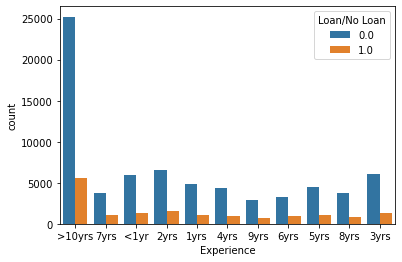

In [15]:
sns.countplot(x=combi["Experience"] , hue =combi["Loan/No Loan"])

In [16]:
combi["Experience"].sort_values().unique()

array(['1yrs', '2yrs', '3yrs', '4yrs', '5yrs', '6yrs', '7yrs', '8yrs',
       '9yrs', '<1yr', '>10yrs'], dtype=object)

In [17]:
def exp(x):
    if(x==">10yrs"):
        return("experienced")
    
    else:
        return("not much")
   


In [18]:
combi["Experience"] = combi["Experience"].apply(exp)
combi["Experience"].value_counts()

not much       80992
experienced    44008
Name: Experience, dtype: int64

In [19]:
combi["Validation"].value_counts()

Source Verified    49150
Vfied              38008
Not Vfied          37842
Name: Validation, dtype: int64

<AxesSubplot:>

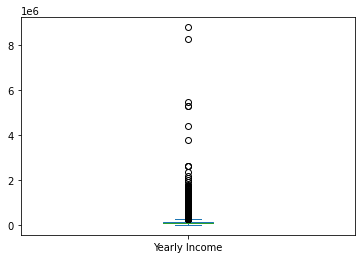

In [20]:
combi["Yearly Income"].plot(kind="box")

<AxesSubplot:ylabel='Density'>

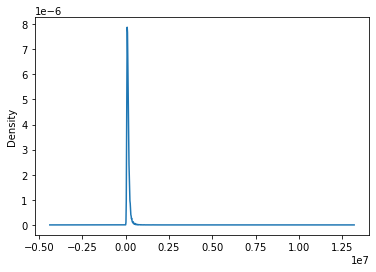

In [21]:
combi["Yearly Income"].plot(kind="density")

In [22]:
combi["Yearly Income"].mean() , combi["Yearly Income"].median() , combi["Yearly Income"].mode()

(134611.16765909008,
 114400.0,
 0    105600.0
 dtype: float64)

In [23]:
combi["Yearly Income"].skew()

18.77742200281253

In [24]:
na=combi['Yearly Income'].median()
combi['Yearly Income'].replace(np.NaN, na, inplace = True)

In [25]:
combi["Home Status"].unique()

array(['MOR??AGE', 'REN?', 'OWN', 'OTHER', 'NONE'], dtype=object)

<AxesSubplot:xlabel='Home Status', ylabel='count'>

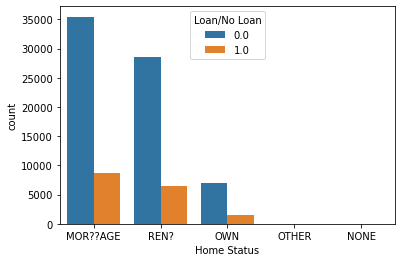

In [26]:
sns.countplot(combi["Home Status"] , hue = combi["Loan/No Loan"])

In [27]:
def housy(x):
    if(x=='MOR??AGE'):
        return("Mortgage")
    if(x=='REN?' ):
        return("Rental")
    if(x=='OWN' ):
        return("Owned")
    else:
        return("others")

In [28]:
combi["Home Status"] = combi["Home Status"].apply(housy)
combi["Home Status"].value_counts()

Mortgage    63072
Rental      49906
Owned       12008
others         14
Name: Home Status, dtype: int64

In [29]:
combi["Unpaid 2 years"].unique()

array([ 0,  4,  2,  1,  3, 11,  5,  6,  7,  9, 12,  8, 10, 18, 16, 15, 13,
       14, 17], dtype=int64)

In [30]:
def twoyrs(x):
    if(x==0):
        return("no risk")
    if((x>=1) & (x<=10) ):
        return("Risk")
    if(x>10 ):
        return("Highly Risk")
    

In [31]:
combi["Unpaid 2 years"] = combi["Unpaid 2 years"].apply(twoyrs)
combi["Unpaid 2 years"].value_counts()

no risk        99683
Risk           25261
Highly Risk       56
Name: Unpaid 2 years, dtype: int64

In [32]:
combi["Unpaid 2 years"].unique()

array(['no risk', 'Risk', 'Highly Risk'], dtype=object)

In [33]:
combi["Already Defaulted"].unique()

array([0, 1, 2, 6, 5, 4, 3], dtype=int64)

In [34]:
combi["Designation"].value_counts()

School Teacher                     2251
Super Lead                         1917
Nurse                              1081
RN                                  926
Owner                               891
                                   ... 
Well Child                            1
Director of Risk and Compliance       1
Reliable Heating & Air Cond Co.       1
Meintenance                           1
ParaEducator                          1
Name: Designation, Length: 54539, dtype: int64

<AxesSubplot:ylabel='Density'>

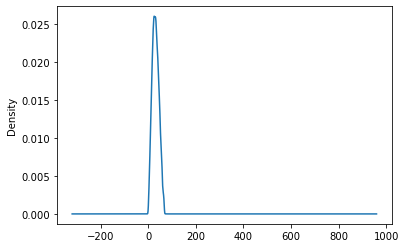

In [35]:
combi["Debt to Income"].plot(kind="density")

In [36]:
combi["Debt to Income"].skew()

0.8948890363840599

In [37]:
combi["Debt to Income"].mean() , combi["Debt to Income"].median() , combi["Debt to Income"].mode()

(30.935573339999365,
 30.156,
 0    24.192
 1    28.224
 dtype: float64)

In [38]:
na=combi['Debt to Income'].median()
combi['Debt to Income'].replace(np.NaN, na, inplace = True)

In [39]:
combi["Postal Code"].unique()

array([91300., 27400., 32800.,  7000., 70800., 77000., 92100.,  6000.,
       92500., 78500., 95900., 49400., 97200., 72200., 11900., 91900.,
       59100., 28300., 80800., 72900., 45000., 27500., 87100., 55000.,
       30300.,    nan, 11700., 75200., 20800., 32500., 35400., 28000.,
       29700., 17700., 95800., 85700., 84400., 16800., 44700.,  2100.,
       76000., 85300., 78700., 20100., 27200., 48500., 77300., 45200.,
       61800., 71400., 18700., 23400., 11200., 13000., 36500., 92600.,
       29400., 10000., 11300., 53500., 95100., 92000., 89400., 96700.,
       12000., 91700.,  2900., 70000., 11600., 48200., 18000.,  8900.,
       38000., 28200., 33100., 99200., 12500., 33000., 73000., 33300.,
       90000.,  5700., 37900., 94100., 89000., 74000., 47100., 33400.,
       99500., 32900., 43700., 38100., 29600.,  6400., 21200., 55100.,
       46400., 94500., 33800., 10400., 11000., 69300., 36600., 68000.,
       48100., 94600., 78200.,  3800., 20000., 78000., 10700., 89500.,
      

<AxesSubplot:ylabel='Density'>

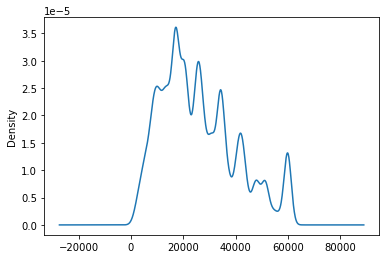

In [40]:
combi["Lend Amount"].plot(kind="density")

In [41]:
combi["Lend Amount"].skew()

0.6435979341089223

In [42]:
combi["Lend Amount"].mean() , combi["Lend Amount"].median() , combi["Lend Amount"].mode()

(25892.776224,
 23940.0,
 0    17100.0
 dtype: float64)

<AxesSubplot:xlabel='Loan/No Loan', ylabel='Deprecatory Records'>

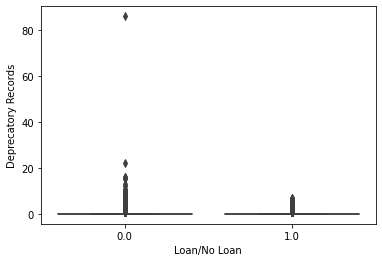

In [43]:
sns.boxplot(y=combi["Deprecatory Records"] , x =combi["Loan/No Loan"])

<AxesSubplot:xlabel='Deprecatory Records', ylabel='count'>

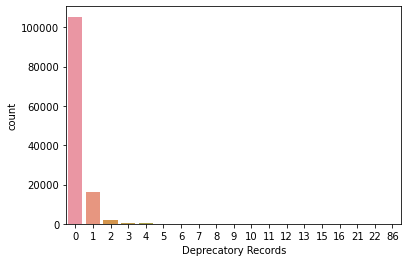

In [44]:
sns.countplot(combi["Deprecatory Records"])

In [45]:
combi["Deprecatory Records"].sort_values().unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 15, 16, 21,
       22, 86], dtype=int64)

In [46]:
def dep(x):
    if(x==0):
        return("no risk")
    if(x==1):
        return("okayish")
    else:
        return("risky")

In [47]:
combi["Deprecatory Records"] = combi["Deprecatory Records"].apply(dep)
combi["Deprecatory Records"].value_counts()

no risk    105391
okayish     16336
risky        3273
Name: Deprecatory Records, dtype: int64

In [48]:
combi["Inquiries"].sort_values().unique()

array([0, 1, 2, 3, 4, 5, 6, 8], dtype=int64)

<AxesSubplot:ylabel='Density'>

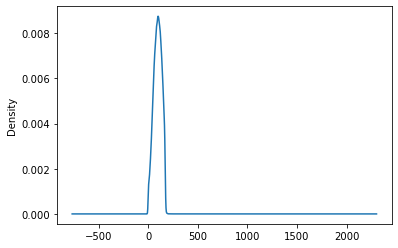

In [49]:
combi["Usage Rate"].plot(kind="density")

<AxesSubplot:ylabel='Density'>

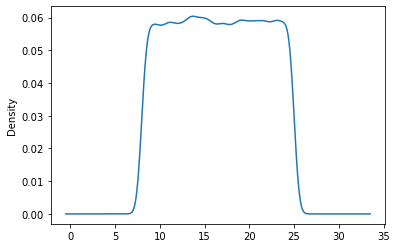

In [50]:
combi["Interest Charged"].plot(kind="density")

<AxesSubplot:ylabel='Density'>

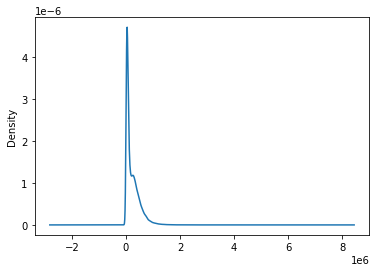

In [51]:
combi["Present Balance"].plot(kind="density")

<AxesSubplot:ylabel='Density'>

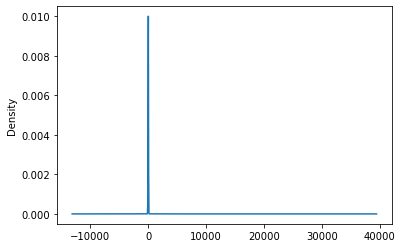

In [52]:
combi["Gross Collection"].plot(kind="density")

In [53]:
combi["Gross Collection"].mean() , combi["Gross Collection"].median() , combi["Gross Collection"].mode()

(39.468409280000046,
 0.0,
 0    0.0
 dtype: float64)

<AxesSubplot:xlabel='Loan/No Loan', ylabel='Sub GGGrade'>

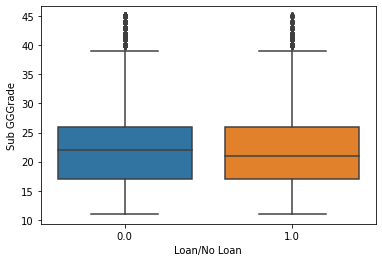

In [54]:
sns.boxplot(y=combi["Sub GGGrade"] , x =combi["Loan/No Loan"])

<AxesSubplot:xlabel='Sub GGGrade', ylabel='Loan/No Loan'>

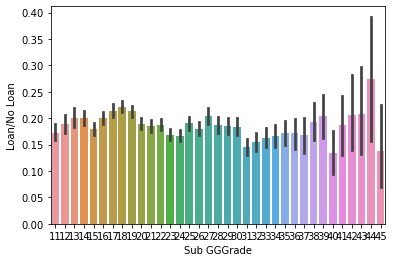

In [55]:
sns.barplot(x=combi["Sub GGGrade"] ,y=combi["Loan/No Loan"])

In [56]:
combi["File Status"].unique()

array(['fully paid', 'whole'], dtype=object)

<AxesSubplot:xlabel='State', ylabel='count'>

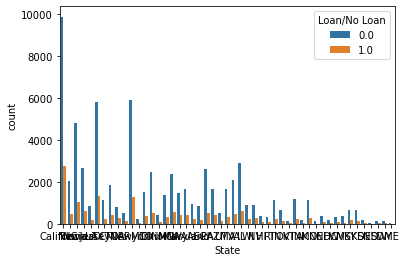

In [57]:
sns.countplot(x=combi["State"] ,hue=combi["Loan/No Loan"])

In [58]:
combi["Account Open"].unique()

array([17, 15,  7,  9, 10, 11, 26,  6, 14,  8, 13, 27, 12, 16, 39, 19,  5,
       20, 18, 30, 34, 21, 24,  3, 29, 25, 23, 32, 28, 22, 44,  4, 68, 83,
       31, 38, 33, 36, 37, 35, 43, 54, 48, 42,  2, 40, 63, 41, 80, 49, 46,
       45, 50, 56, 52, 51, 57, 65, 47, 60], dtype=int64)

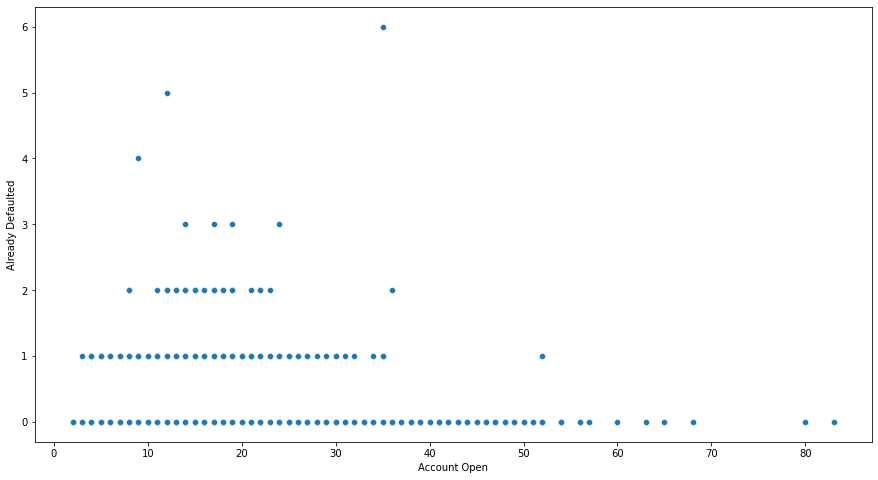

In [59]:
plt.figure(figsize=(15,8))
sns.scatterplot(combi["Account Open"] , combi["Already Defaulted"])
plt.show()

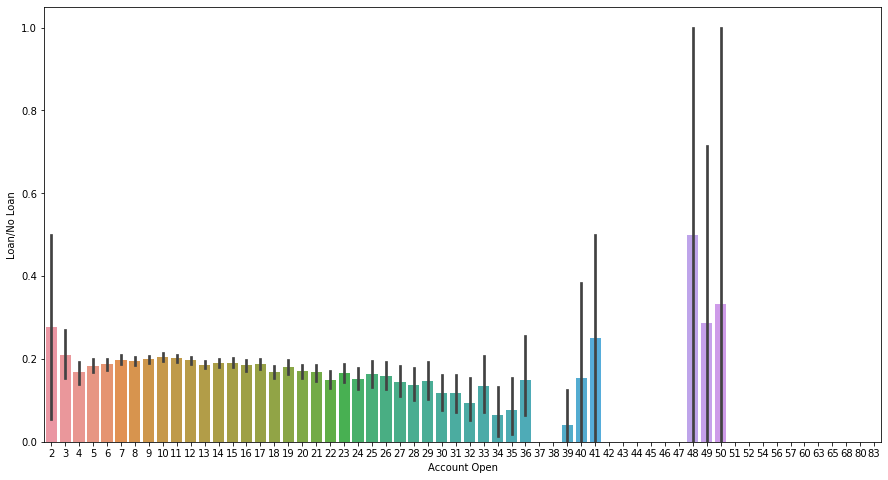

In [60]:
plt.figure(figsize=(15,8))
sns.barplot(combi["Account Open"] , combi["Loan/No Loan"])
plt.show()

In [61]:
combi["Total Unpaid CL"].mean() ,combi["Total Unpaid CL"].median(), combi["Total Unpaid CL"].mode()

(53322.48635361365,
 39674.0,
 0    24070.0
 1    24900.0
 dtype: float64)

In [62]:
combi["Total Unpaid CL"].skew()

5.559470108904464

<AxesSubplot:ylabel='Density'>

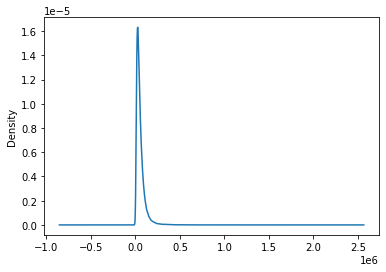

In [63]:
combi["Total Unpaid CL"].plot(kind="density")

In [64]:
me=combi['Total Unpaid CL'].median()
combi['Total Unpaid CL'].replace(np.NaN, me, inplace = True)

<AxesSubplot:xlabel='Duration', ylabel='count'>

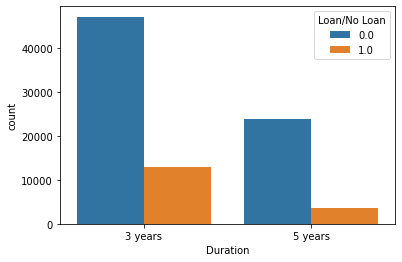

In [65]:
sns.countplot(combi["Duration"] , hue=combi["Loan/No Loan"])

In [66]:
combi["Duration"].value_counts()

3 years    85870
5 years    39130
Name: Duration, dtype: int64

<AxesSubplot:ylabel='Density'>

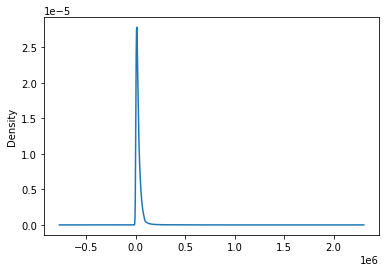

In [67]:
combi['Unpaid Amount'].plot(kind="density")

In [68]:
b=combi['Unpaid Amount'].median()

In [69]:
combi['Unpaid Amount'].replace(np.NaN, b, inplace = True)

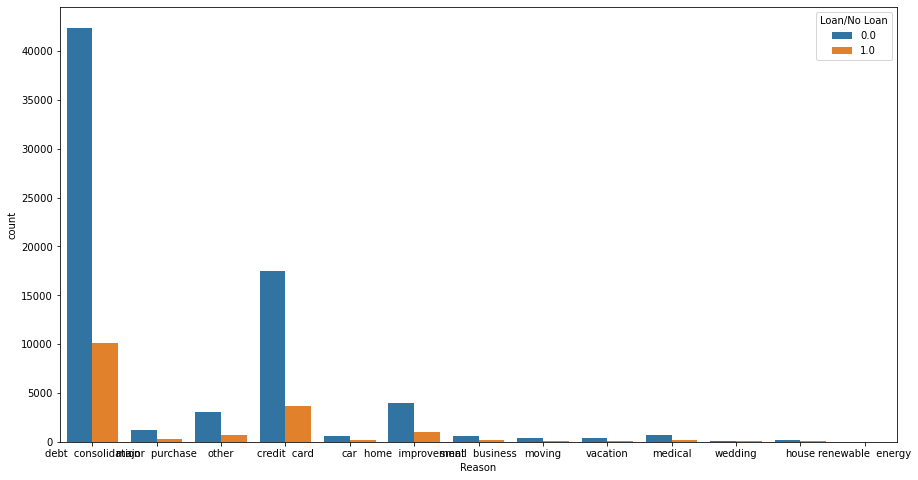

In [70]:
plt.figure(figsize=(15,8))
sns.countplot(combi["Reason"] , hue=combi["Loan/No Loan"])
plt.show()

In [71]:
combi["Reason"].unique()

array(['debt  consolidation', 'major  purchase', 'other', 'credit  card',
       'car', 'home  improvement', 'small  business', 'moving',
       'vacation', 'medical', 'wedding', 'house', 'renewable  energy'],
      dtype=object)

In [72]:
combi["Claim Type"].value_counts()

I    124934
J        66
Name: Claim Type, dtype: int64

<AxesSubplot:>

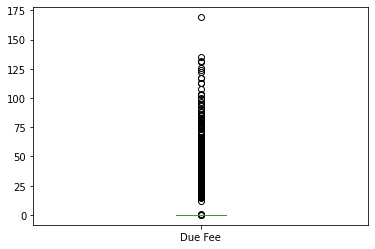

In [73]:
combi["Due Fee"].plot(kind="box")

<AxesSubplot:>

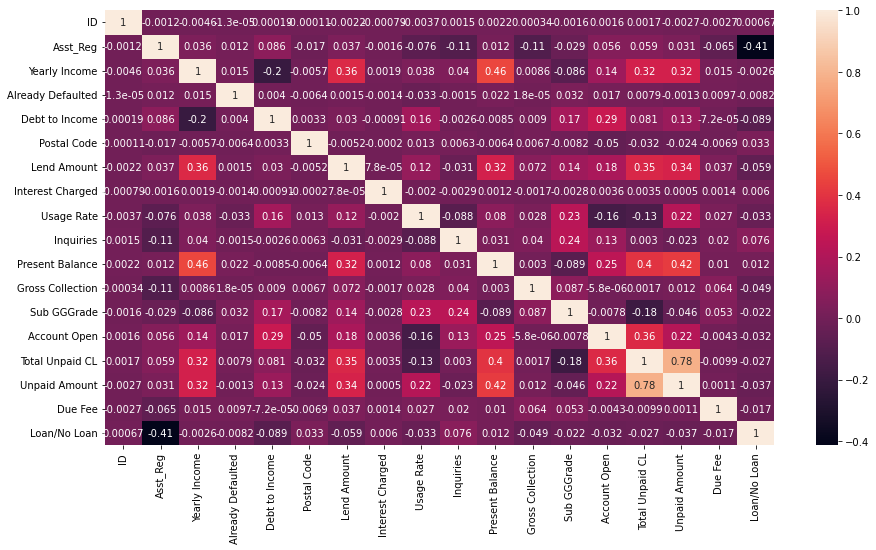

In [74]:
plt.figure(figsize = (15,8))
sns.heatmap(combi.corr() , annot=True)

### INFERENCES :

1. The I.D column has unique values for evry entry.
2. There are no duplicates present in the data.
3. The target class is highly imbalanced.
4. The GGGrade has 7 category's in the data.
5. The experience has from 1 to more than 10yrs of entry in data.
6. The experience variable has too many entries so bin them into two categorys (>10 = experience)&(<10 not experienced)
7. The validation has 3 category's.
8. Yearly income column is highly skewed with outliers and mean of 134611.16.
9. Home status with mortgage has higher no of loans approved.
10. Since there were overlap in the categorys so we binned them together.
11. The designation column had too many entrys to keep or bin them genrically. so we will drop them.
12. Postal code has values which cant be traced back to names and too many category to keep.
13. lend amount is near normally distributed.
14. The depracatory record has too many values as it is assigned after loan defaulting. So, binning them into three categorys.
15. Loan for three year term is approved more than 5 yrs tenure loan.
16. There are two types of claim type I,J, Where j has only 70 records while i has 124930 records.
17. Reason for debt consolidation is the most reason for loan application.
18. Account open has highest entry of 83 A/c which is not possible. rendiring the variable invalid.
19. Sub GGGrade is sub category of GGGrade. which can cause multi-colinearity.
20. Gross collection is highly skewed with the mean of 39.4, and median and mode of 0.

### DROPPING THE INSIGNIFICANT VARIABLES FOUND IN THE E.D.A PROCESS.

In [76]:
combi.drop(["ID","Postal Code" , "Designation" ,
            "Sub GGGrade" , "State" , "Account Open", "Reason" , "Claim Type"] , axis= 1 , inplace= True)

In [77]:
combi.isna().sum()

Asst_Reg                   0
GGGrade                    0
Experience                 0
Validation                 0
Yearly Income              0
Home Status                0
Unpaid 2 years             0
Already Defaulted          0
Debt to Income             0
Lend Amount                0
Deprecatory Records        0
Interest Charged           0
Usage Rate                 0
Inquiries                  0
Present Balance            0
Gross Collection           0
File Status                0
Total Unpaid CL            0
Duration                   0
Unpaid Amount              0
Due Fee                    0
Loan/No Loan           37500
dtype: int64

In [78]:
combi.dtypes

Asst_Reg                 int64
GGGrade                 object
Experience              object
Validation              object
Yearly Income          float64
Home Status             object
Unpaid 2 years          object
Already Defaulted        int64
Debt to Income         float64
Lend Amount            float64
Deprecatory Records     object
Interest Charged       float64
Usage Rate             float64
Inquiries                int64
Present Balance        float64
Gross Collection       float64
File Status             object
Total Unpaid CL        float64
Duration                object
Unpaid Amount          float64
Due Fee                float64
Loan/No Loan           float64
dtype: object

In [80]:
combi1 = pd.get_dummies(combi , drop_first=True)

### SPLITTING THE DATASETS INTO ORIGINAL SHAPE

In [81]:
newtrain = combi1.loc[0:train.shape[0]-1] 
newtest =  combi1.loc[train.shape[0]:, ]    
newtest.drop("Loan/No Loan" , axis=1 , inplace=True)
newtrain.shape,newtest.shape,train.shape,test.shape

((87500, 32), (37500, 31), (87500, 30), (37500, 29))

### FINDING THE VIF_Factor

In [82]:
vif = pd.DataFrame() 
vif['VIF_Factor'] = [variance_inflation_factor(newtrain.values,i) for i in range(newtrain.shape[1])] 
vif['Features'] = newtrain.columns 
vif.sort_values('VIF_Factor', ascending=False).reset_index(drop=True)

,VIF_Factor,Features
0,35.103673,Unpaid 2 years_no risk
1,12.291482,Interest Charged
2,9.966250,Usage Rate
3,9.670632,Unpaid 2 years_Risk
4,7.419971,Total Unpaid CL
5,7.011290,Lend Amount
6,7.006090,Debt to Income
7,5.830770,Unpaid Amount
8,5.168760,Asst_Reg
9,4.503195,Yearly Income


### INFERENCES :

1. Columns dropped were ["ID","Postal Code" , "Designation" ,"Sub GGGrade" , "State" , "Account Open", "Reason" , "Claim Type"]
2. Null values were treated and no outlier were treated as the loan amount of that size could be approved.
3. The vif score to find if there is multi- colinearity in the data, Which were considerable.
4. 31 columns are left with feature engineering and dummy variable creations.


In [83]:
newtrain.head(2)

,Asst_Reg,Yearly Income,Already Defaulted,Debt to Income,Lend Amount,Interest Charged,Usage Rate,Inquiries,Present Balance,Gross Collection,...,Validation_Vfied,Home Status_Owned,Home Status_Rental,Home Status_others,Unpaid 2 years_Risk,Unpaid 2 years_no risk,Deprecatory Records_okayish,Deprecatory Records_risky,File Status_whole,Duration_5 years
0,421802,633600.0,0,12.5496,42023.25,15.39,88.924,3,607161.90,0.0,...,1,0,0,0,0,1,0,0,0,0
1,3964312,85483.2,0,9.0048,38133.00,9.94,102.856,0,269234.06,0.0,...,0,0,1,0,0,1,0,0,1,1


In [84]:
newtrain.drop(["Unpaid 2 years_Risk" , "Unpaid 2 years_no risk"], axis=1 , inplace=True)

In [125]:
x=newtrain.drop("Loan/No Loan" , axis=1)
y=newtrain["Loan/No Loan"]

In [86]:
x1=sm.add_constant(x)
X_train, X_test, y_train, y_test = train_test_split(x1, y, random_state = 1, test_size = 0.2)

**LOGISTIC REGRESSION**

In [87]:
logreg = sm.Logit(y_train, X_train).fit()

print(logreg.summary())

         Current function value: 0.371097
         Iterations: 35


C:\Users\yadve\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                           Logit Regression Results                           
Dep. Variable:           Loan/No Loan   No. Observations:                70000
Model:                          Logit   Df Residuals:                    69970
Method:                           MLE   Df Model:                           29
Date:                Wed, 06 Jul 2022   Pseudo R-squ.:                  0.2347
Time:                        23:52:17   Log-Likelihood:                -25977.
converged:                      False   LL-Null:                       -33944.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                           0.9389      0.071     13.254      0.000       0.800       1.078
Asst_Reg                    -5.923e-07   6.47e-09    -91.529      0.000   -6.05e

In [123]:
a=logreg.pvalues>0.05
a[a==True]

Yearly Income                  True
Interest Charged               True
Gross Collection               True
Total Unpaid CL                True
Experience_not much            True
Validation_Vfied               True
Home Status_Owned              True
Home Status_others             True
Deprecatory Records_okayish    True
Deprecatory Records_risky      True
dtype: bool

**RANDOM FOREST**

In [126]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, random_state = 1, test_size = 0.2)
rf= RandomForestClassifier()
model = rf.fit(xtrain , ytrain)
pred = rf.predict(xtest)


In [90]:
print(classification_report(ytest , pred))

              precision    recall  f1-score   support

         0.0       0.85      0.97      0.91     14225
         1.0       0.68      0.26      0.37      3275

    accuracy                           0.84     17500
   macro avg       0.76      0.61      0.64     17500
weighted avg       0.82      0.84      0.81     17500



In [91]:
print(confusion_matrix(ytest , pred))

[[13826   399]
 [ 2436   839]]


In [92]:
accuracy_score(ytest , pred)

0.838

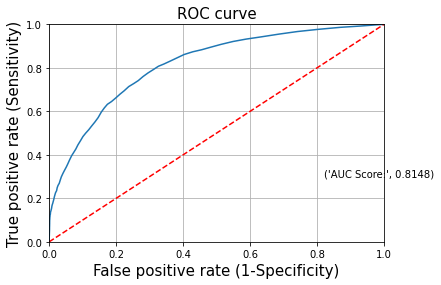

In [127]:
def plot_roc(model):
    y_pred_prob = rf.predict_proba(xtest)[:,1]
    
    # the roc_curve() returns the values for false positive rate, true positive rate and threshold
    # pass the actual target values and predicted probabilities to the function
    fpr, tpr, thresholds = roc_curve(ytest, y_pred_prob)

    # plot the ROC curve
    plt.plot(fpr, tpr)

    # set limits for x and y axes
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])

    # plot the straight line showing worst prediction for the model
    plt.plot([0, 1], [0, 1],'r--')

    # add plot and axes labels
    # set text size using 'fontsize'
    plt.title('ROC curve', fontsize = 15)
    plt.xlabel('False positive rate (1-Specificity)', fontsize = 15)
    plt.ylabel('True positive rate (Sensitivity)', fontsize = 15)

    # add the AUC score to the plot
    # 'x' and 'y' gives position of the text
    # 's' is the text 
    # use round() to round-off the AUC score upto 4 digits
    plt.text(x = 0.82, y = 0.3, s = ('AUC Score:',round(roc_auc_score(y_test, y_pred_prob),4)))

    # plot the grid
    plt.grid(True)
    
plot_roc(rf)    

1. **These variable had P_value > 0.05 rendering them statistically insignificant**

2. **["Yearly Income","Already Defaulted","Interest Charged","Gross Collection","Total Unpaid CL",
            "Experience_not much","Validation_Vfied","Home Status_Owned","Home Status_others",
            "Deprecatory Records_okayish","Deprecatory Records_risky"]**

In [129]:
combi2=newtrain.drop(["Yearly Income","Already Defaulted","Interest Charged","Gross Collection","Total Unpaid CL",
            "Experience_not much","Validation_Vfied","Home Status_Owned","Home Status_others",
            "Deprecatory Records_okayish","Deprecatory Records_risky"], axis=1)

In [130]:
a=combi2.drop("Loan/No Loan" , axis=1)
b=newtrain["Loan/No Loan"]




**RANDOM FOREST**

In [131]:
xtrain, xtest, ytrain, ytest = train_test_split(a, b, random_state = 1, test_size = 0.2)
rf2= RandomForestClassifier()
model = rf2.fit(xtrain , ytrain)
pred = rf2.predict(xtest)

In [132]:
pred2= rf2.predict(xtrain)

In [97]:
print(classification_report(ytest , pred))

              precision    recall  f1-score   support

         0.0       0.85      0.97      0.90     14225
         1.0       0.64      0.25      0.36      3275

    accuracy                           0.83     17500
   macro avg       0.74      0.61      0.63     17500
weighted avg       0.81      0.83      0.80     17500



In [98]:
print(confusion_matrix(ytest , pred))

[[13760   465]
 [ 2466   809]]


In [99]:
accuracy_score(ytest , pred)

0.8325142857142858

In [100]:
accuracy_score(ytrain , pred2)

0.9999428571428571

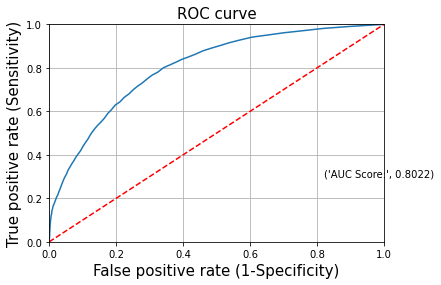

In [133]:
def plot_roc(model):
    y_pred_prob = rf2.predict_proba(xtest)[:,1]
    
    # the roc_curve() returns the values for false positive rate, true positive rate and threshold
    # pass the actual target values and predicted probabilities to the function
    fpr, tpr, thresholds = roc_curve(ytest, y_pred_prob)

    # plot the ROC curve
    plt.plot(fpr, tpr)

    # set limits for x and y axes
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])

    # plot the straight line showing worst prediction for the model
    plt.plot([0, 1], [0, 1],'r--')

    # add plot and axes labels
    # set text size using 'fontsize'
    plt.title('ROC curve', fontsize = 15)
    plt.xlabel('False positive rate (1-Specificity)', fontsize = 15)
    plt.ylabel('True positive rate (Sensitivity)', fontsize = 15)

    # add the AUC score to the plot
    # 'x' and 'y' gives position of the text
    # 's' is the text 
    # use round() to round-off the AUC score upto 4 digits
    plt.text(x = 0.82, y = 0.3, s = ('AUC Score:',round(roc_auc_score(ytest, y_pred_prob),4)))

    # plot the grid
    plt.grid(True)
    
plot_roc(rf2)    

**GRADIENT BOOSTING ALGORITHM**

In [134]:
gbm = GradientBoostingClassifier()
model = gbm.fit(xtrain , ytrain)
pred1 = gbm.predict(xtest)

In [102]:
print(classification_report(ytest , pred1))

              precision    recall  f1-score   support

         0.0       0.85      0.97      0.91     14225
         1.0       0.67      0.23      0.34      3275

    accuracy                           0.83     17500
   macro avg       0.76      0.60      0.62     17500
weighted avg       0.81      0.83      0.80     17500



In [103]:
print(confusion_matrix(ytest , pred1))

[[13862   363]
 [ 2532   743]]


In [104]:
accuracy_score(ytest , pred1)

0.8345714285714285

In [105]:
pred3= gbm.predict(xtrain)

In [106]:
accuracy_score(ytrain , pred3)

0.8371285714285714

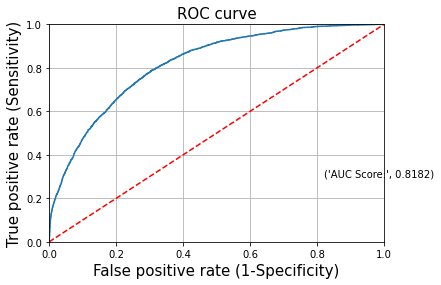

In [135]:
def plot_roc(model):
    y_pred_prob = gbm.predict_proba(xtest)[:,1]
    
    # the roc_curve() returns the values for false positive rate, true positive rate and threshold
    # pass the actual target values and predicted probabilities to the function
    fpr, tpr, thresholds = roc_curve(ytest, y_pred_prob)

    # plot the ROC curve
    plt.plot(fpr, tpr)

    # set limits for x and y axes
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])

    # plot the straight line showing worst prediction for the model
    plt.plot([0, 1], [0, 1],'r--')

    # add plot and axes labels
    # set text size using 'fontsize'
    plt.title('ROC curve', fontsize = 15)
    plt.xlabel('False positive rate (1-Specificity)', fontsize = 15)
    plt.ylabel('True positive rate (Sensitivity)', fontsize = 15)

    # add the AUC score to the plot
    # 'x' and 'y' gives position of the text
    # 's' is the text 
    # use round() to round-off the AUC score upto 4 digits
    plt.text(x = 0.82, y = 0.3, s = ('AUC Score:',round(roc_auc_score(y_test, y_pred_prob),4)))

    # plot the grid
    plt.grid(True)
    
plot_roc(gbm)    

**POWER TRANSFORMER WITH RANDOM FOREST**

In [136]:
power = PowerTransformer()
combi3 = power.fit_transform(combi2)

In [137]:
t=combi2.drop("Loan/No Loan" , axis=1)
y=newtrain["Loan/No Loan"]


In [138]:
xtrain, xtest, ytrain, ytest = train_test_split(t, y, random_state = 1, test_size = 0.2)
rf1= RandomForestClassifier()
model = rf1.fit(xtrain , ytrain)
preds = rf1.predict(xtest)

In [110]:
print(confusion_matrix(ytest , preds))

[[13773   452]
 [ 2457   818]]


In [111]:
print(classification_report(ytest , preds))

              precision    recall  f1-score   support

         0.0       0.85      0.97      0.90     14225
         1.0       0.64      0.25      0.36      3275

    accuracy                           0.83     17500
   macro avg       0.75      0.61      0.63     17500
weighted avg       0.81      0.83      0.80     17500



In [112]:
accuracy_score(ytest , preds)

0.8337714285714286

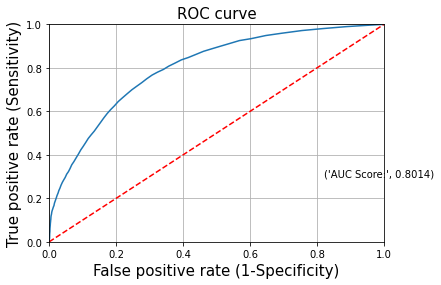

In [140]:
def plot_roc(model):
    y_pred_prob = rf1.predict_proba(xtest)[:,1]
    
    # the roc_curve() returns the values for false positive rate, true positive rate and threshold
    # pass the actual target values and predicted probabilities to the function
    fpr, tpr, thresholds = roc_curve(ytest, y_pred_prob)

    # plot the ROC curve
    plt.plot(fpr, tpr)

    # set limits for x and y axes
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])

    # plot the straight line showing worst prediction for the model
    plt.plot([0, 1], [0, 1],'r--')

    # add plot and axes labels
    # set text size using 'fontsize'
    plt.title('ROC curve', fontsize = 15)
    plt.xlabel('False positive rate (1-Specificity)', fontsize = 15)
    plt.ylabel('True positive rate (Sensitivity)', fontsize = 15)

    # add the AUC score to the plot
    # 'x' and 'y' gives position of the text
    # 's' is the text 
    # use round() to round-off the AUC score upto 4 digits
    plt.text(x = 0.82, y = 0.3, s = ('AUC Score:',round(roc_auc_score(ytest, y_pred_prob),4)))

    # plot the grid
    plt.grid(True)
    
plot_roc(rf1)    

### INFERENCES :

1. The logistic regression is used as a base model for to check p_values and relations b/w variables and target.
2. Decision tree and random forest were used as models to verify and check class distribution of test data.
3. gradient boosting algorithm was final model used, 
4. In all the algorithms the accuracy score increased but the mis-classification was very high.
5. The precision and recall had too much fifference to consider, rendering the whole model very poor.
6. These statements are also backed by the Roc curve of the models as it is purely based on tpr, fpr.